# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeRegressor

Проведем первичный осмотр данных.

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
gold_recovery_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
gold_recovery_train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [4]:
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
gold_recovery_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
gold_recovery_full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

Данные загружены корректно.

In [6]:
def recovery(data):
    n = 100 * data['rougher.output.concentrate_au']*(data['rougher.input.feed_au'] - data['rougher.output.tail_au'])/(data['rougher.input.feed_au']*(data['rougher.output.concentrate_au'] - data['rougher.output.tail_au']))
    return n 

Проведем рассчет коэффициента восстановления ископаемого.

In [7]:
predict = recovery(gold_recovery_train)
print(predict)
print()
print('MAE равно ' , mean_absolute_error(gold_recovery_train['rougher.output.recovery'],predict))

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

MAE равно  1.1498046842860452e-14


MAE маленькое, а значит эффективность обогащения рассчитана верно.

In [8]:
gold_recovery_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [9]:
gold_recovery_train = gold_recovery_train.ffill()
gold_recovery_test = gold_recovery_test.ffill()

## Анализ данных

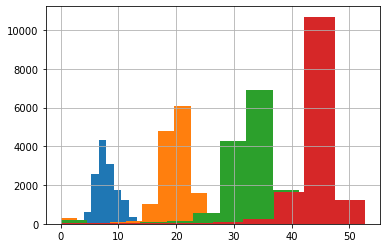

In [16]:
gold_recovery_train['rougher.input.feed_au'].hist();
gold_recovery_train['rougher.output.concentrate_au'].hist();
gold_recovery_train['primary_cleaner.output.concentrate_au'].hist();
gold_recovery_train['final.output.concentrate_au'].hist();

Как мы можем заметить концентрация AU растет.

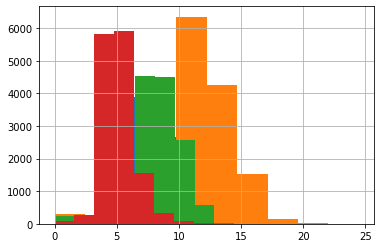

In [17]:
gold_recovery_train['rougher.input.feed_ag'].hist();
gold_recovery_train['rougher.output.concentrate_ag'].hist();
gold_recovery_train['primary_cleaner.output.concentrate_ag'].hist();
gold_recovery_train['final.output.concentrate_ag'].hist();

Как мы можем заметить концентрация AG уменьшается.

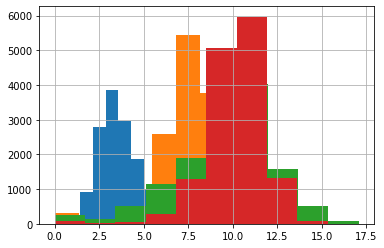

In [18]:
gold_recovery_train['rougher.input.feed_pb'].hist();
gold_recovery_train['rougher.output.concentrate_pb'].hist();
gold_recovery_train['primary_cleaner.output.concentrate_pb'].hist();
gold_recovery_train['final.output.concentrate_pb'].hist();

Как мы можем заметить концентрация pb растет.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


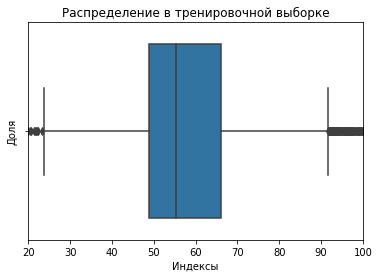

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


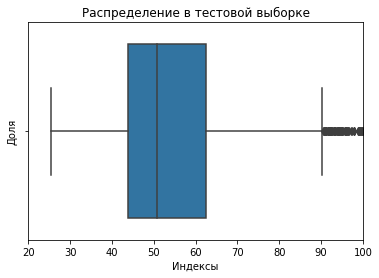

In [19]:
sns.boxplot(data = gold_recovery_train['rougher.input.feed_size']).set(title = 'Распределение в тренировочной выборке',ylabel = 'Доля', xlabel = 'Индексы', xlim = (20,100))
plt.show()
sns.boxplot(data = gold_recovery_test['rougher.input.feed_size']).set(title = 'Распределение в тестовой выборке', xlabel = 'Индексы', ylabel = 'Доля', xlim = (20,100))
plt.show()

Как мы можем заметить распределение различается не сильно.

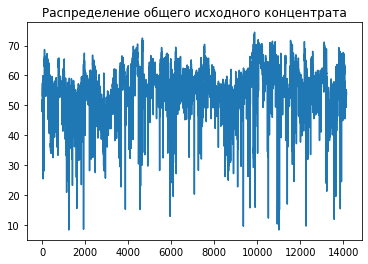

In [20]:
for i in range(len(gold_recovery_train)):
    rougher = gold_recovery_train.loc[i,'rougher.input.feed_ag'] + gold_recovery_train.loc[i,'rougher.input.feed_au'] + gold_recovery_train.loc[i,'rougher.input.feed_pb'] + gold_recovery_train.loc[i,'rougher.input.feed_sol']
    if rougher < 1:
        gold_recovery_train = gold_recovery_train.drop([i],axis=0)
rougher = gold_recovery_train['rougher.input.feed_ag'] + gold_recovery_train['rougher.input.feed_au'] + gold_recovery_train['rougher.input.feed_pb'] + gold_recovery_train['rougher.input.feed_sol']
rougher.plot(title = 'Распределение общего исходного концентрата');

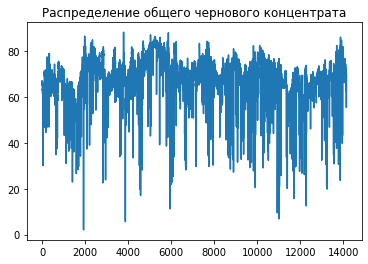

In [21]:
for i in gold_recovery_train.index:
    black = gold_recovery_train.loc[i,'rougher.output.concentrate_ag'] + gold_recovery_train.loc[i,'rougher.output.concentrate_au'] + gold_recovery_train.loc[i,'rougher.output.concentrate_pb'] + gold_recovery_train.loc[i,'rougher.output.concentrate_sol']
    if black < 1:
        gold_recovery_train = gold_recovery_train.drop([i],axis=0)
black = gold_recovery_train['rougher.output.concentrate_ag'] + gold_recovery_train['rougher.output.concentrate_au'] + gold_recovery_train['rougher.output.concentrate_pb'] + gold_recovery_train['rougher.output.concentrate_sol']
black.plot(title='Распределение общего чернового концентрата');

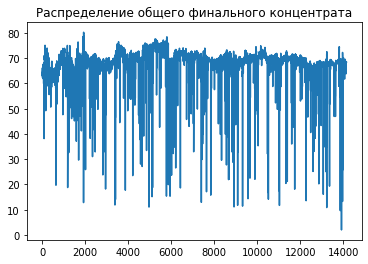

In [22]:
for i in gold_recovery_train.index:
    final = gold_recovery_train.loc[i,'final.output.concentrate_ag'] + gold_recovery_train.loc[i,'final.output.concentrate_au'] + gold_recovery_train.loc[i,'final.output.concentrate_pb'] + gold_recovery_train.loc[i,'final.output.concentrate_sol']
    if final < 1:
        gold_recovery_train = gold_recovery_train.drop([i],axis=0)
final = gold_recovery_train['final.output.concentrate_ag'] + gold_recovery_train['final.output.concentrate_au'] + gold_recovery_train['final.output.concentrate_pb'] + gold_recovery_train['final.output.concentrate_sol']
final.plot(title='Распределение общего финального концентрата');

Мы можем заметить,что суммарная концентрация растет в зависимости от этапа.

## Модель

Рассчитаем smape

In [23]:
def total_smape(y_true,y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred))/2
    smape = ((numerator/denominator)*100).sum() / len(y_pred)
    return 0.25*smape[0] + 0.75*smape[1]

In [24]:
scoring = make_scorer(total_smape,greater_is_better = False)
features_train = gold_recovery_train.drop(['date','rougher.output.recovery','final.output.recovery'],axis=1)
target_1 = gold_recovery_train['rougher.output.recovery']
target_2 = gold_recovery_train['final.output.recovery']
target_train = gold_recovery_train[['rougher.output.recovery','final.output.recovery']]

In [25]:
for i in features_train.columns:
    if i not in gold_recovery_test:
        features_train = features_train.drop([i],axis=1)

In [26]:
model = LinearRegression()
scores = cross_val_score(model,features_train,target_train, cv=5,scoring = scoring) 
n = pd.Series(scores)
print(np.abs(n.mean()))

10.011849233361389


Метрика равна 10.

In [27]:
rf_grid = [{'n_estimators':[90,110],'max_depth':[25,30]}]
forest_reg = RandomForestRegressor()
model = GridSearchCV(forest_reg, rf_grid,
                         scoring = scoring, cv=2, verbose=1)
model.fit(features_train,target_train)
print(model.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'max_depth': 25, 'n_estimators': 90}


Лучшая модель случайного леса с параметрами : n_estimators = 100,max_depth = 30

In [28]:
model = RandomForestRegressor(n_estimators = 100, max_depth = 30)
scores = cross_val_score(model,features_train,target_train, cv=5,scoring = scoring) 
n = pd.Series(scores)
print(np.abs(n.mean()))

9.473721231974256


Метрика равна 9,5.

In [29]:
rf_grid = [{'max_depth' : [1,50]}]
tree_reg = DecisionTreeRegressor()
model = GridSearchCV(tree_reg,rf_grid,scoring = scoring, cv = 2, verbose = 1)
model.fit(features_train,target_train)
print(model.best_params_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'max_depth': 1}


Лучшая модель с максимальной глубиной 1.

In [30]:
model = DecisionTreeRegressor(max_depth = 1)
scores = cross_val_score(model,features_train,target_train, cv=5,scoring = scoring) 
n = pd.Series(scores)
print(np.abs(n.mean()))

8.968251376373434


In [31]:
target_full = gold_recovery_full[['date','rougher.output.recovery','final.output.recovery']]

Таким образом, наилучшая модель = это Линейная регрессия.

In [32]:
gold_recovery_test = gold_recovery_test.merge(target_full,on='date')
print(gold_recovery_test.shape)

features_test = gold_recovery_test.drop(['date','rougher.output.recovery','final.output.recovery'],axis=1)
target_test = gold_recovery_test[['rougher.output.recovery','final.output.recovery']]


(5290, 55)


In [37]:
features_train = features_train[:len(target_test)]
target_train = target_train[:len(target_test)]
print(features_train.shape,target_train.shape)

(5290, 52) (5290, 2)


In [ ]:
Модель случайного леса показала лучшее значение метрики. Значит, на ней мы построим наши предсказания.

In [38]:
model = DecisionTreeRegressor(max_depth = 1)
model.fit(features_train,target_train)
predicted = model.predict(features_train)

In [39]:
predicted = pd.DataFrame(data=predicted,columns = ['rougher.output.recovery','final.output.recovery'])
print(predicted)

      rougher.output.recovery  final.output.recovery
0                   81.800424              66.307485
1                   80.627053              64.298735
2                   81.147131              64.457285
3                   80.731038              64.029754
4                   79.519040              62.510818
...                       ...                    ...
5285                92.086486              70.533885
5286                90.827524              69.850290
5287                91.429154              70.653796
5288                93.122587              71.635292
5289                92.319347              71.477833

[5290 rows x 2 columns]


In [42]:
total_smape(target_test,predicted)

13.163074077692881

Мы получили модель для предсказания  коэффициент восстановления золота из золотосодержащей руды.Наилучшая модель - это линейная регрессия. Метрика SMAPE получилась равной 13.

Итоговый вывод: Мы получили модель для предсказания  коэффициент восстановления золота из золотосодержащей руды. Модель прошла проверку метрикой SMAPE и является наилучшей из приведенных.